In [17]:
# Import module

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Data import

df=pd.read_excel(r"C:\Users\gulre\OneDrive\Desktop\Covid19data.xlsx")
df.head()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
0,1,03/22/2019,Anhui,Mainland,China,1/22/2020 17:00,1,0,0
1,2,03/24/2019,Beijing,Mainland,China,1/22/2020 17:00,14,0,0
2,3,03/25/2019,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0
3,4,03/26/2019,Fujian,Mainland,China,1/22/2020 17:00,1,0,0
4,5,03/27/2019,Gansu,Mainland,China,1/22/2020 17:00,0,0,0


In [19]:
# EDA
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              15039 non-null  int64 
 1   ObservationDate  15039 non-null  object
 2   Province/State   12263 non-null  object
 3   Region           15038 non-null  object
 4   Country          15039 non-null  object
 5   Last Update      15039 non-null  object
 6   Confirmed        15039 non-null  int64 
 7   Deaths           15039 non-null  int64 
 8   Recovered        15039 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [4]:
df.size

135351

In [5]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Region', 'Country',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [6]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,15039.000000,15039.000000,15039.000000,15039.000000
mean,89172.137243,4188.962763,152.885498,3495.312654
std,70642.721248,13680.764586,688.505284,11788.107210
min,1.000000,0.000000,0.000000,0.000000
25%,20454.500000,157.000000,1.000000,144.000000
50%,80416.000000,481.000000,3.000000,358.000000
75%,151674.500000,1020.000000,8.000000,985.000000
max,221631.000000,94871.000000,4512.000000,85439.000000


In [7]:
# Missing data
df.isnull()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15034,False,False,True,False,False,False,False,False,False
15035,False,False,True,False,False,False,False,False,False
15036,False,False,True,False,False,False,False,False,False
15037,False,False,True,False,False,False,False,False,False


In [8]:
df.notnull()

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
15034,True,True,False,True,True,True,True,True,True
15035,True,True,False,True,True,True,True,True,True
15036,True,True,False,True,True,True,True,True,True
15037,True,True,False,True,True,True,True,True,True


In [24]:
# Correct data type
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              15039 non-null  int64         
 1   ObservationDate  15039 non-null  datetime64[ns]
 2   Province/State   12263 non-null  object        
 3   Region           15038 non-null  object        
 4   Country          15039 non-null  object        
 5   Last Update      15039 non-null  object        
 6   Confirmed        15039 non-null  int64         
 7   Deaths           15039 non-null  int64         
 8   Recovered        15039 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.0+ MB


In [26]:
df['Last Update'] = pd.to_datetime(           #pd.to_datetime() converts strings to pandas datetime64[ns] datatype.
    df['Last Update'].astype(str)             #df['Last Update'].astype(str)-Ensures all values in the column are strings.
        .str.replace('T', ' ', regex=False),  #The 'T' separates the date and time. Pandas can parse it, but replacing it with a space ensures consistent formatting.
    errors='coerce'  # errors='coerce' ensures that if a string cannot be converted (like "nan" or a malformed date), it becomes NaT (pandas’ "Not a Time") instead of throwing an error.
)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              15039 non-null  int64         
 1   ObservationDate  15039 non-null  datetime64[ns]
 2   Province/State   12263 non-null  object        
 3   Region           15038 non-null  object        
 4   Country          15039 non-null  object        
 5   Last Update      75 non-null     datetime64[ns]
 6   Confirmed        15039 non-null  int64         
 7   Deaths           15039 non-null  int64         
 8   Recovered        15039 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 1.0+ MB


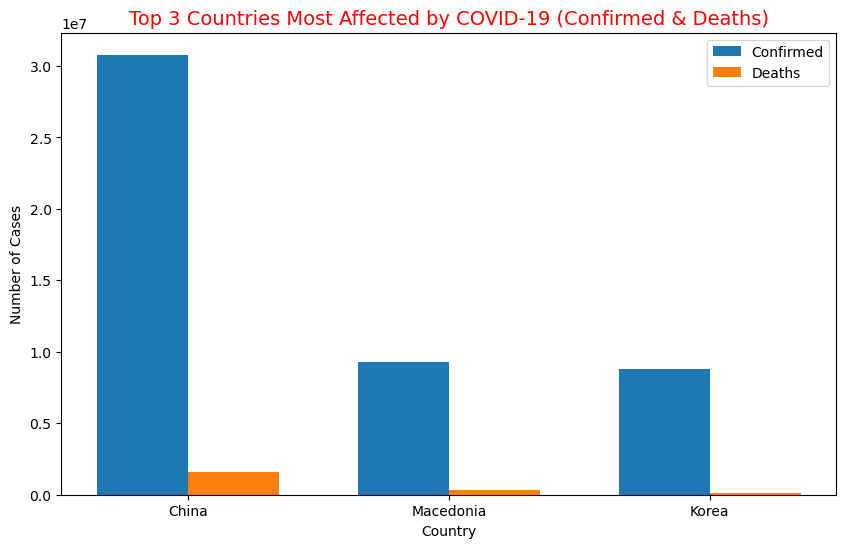

In [34]:
#Task 1: Explore and visualize the 3 countries most affected in terms of Confirmed Cases and Deaths.

import matplotlib.pyplot as plt
import numpy as np

# Top 3 countries by confirmed cases
df1 = df.groupby('Country')[['Confirmed','Deaths']].sum().sort_values(by="Confirmed", ascending=False).head(3)

# Extract X positions
x = np.arange(len(df1))         # positions: [0,1,2]

# Extract values
confirmed = df1['Confirmed']
deaths = df1['Deaths']

width = 0.35 

plt.figure(figsize=(10,6))      # 10 → width of the chart (in inches) & 6 → height of the chart (in inches)

# Confirmed bars
plt.bar(x - width/2, confirmed, width=0.35, label='Confirmed')  #Bars for Confirmed are placed slightly left.

# Deaths bars
plt.bar(x + width/2, deaths, width=0.35, label='Deaths')       #Bars for Deaths are placed slightly Right.

# X-axis labels
plt.xticks(x, df1.index)    # Show the country names exactly at positions 0, 1, and 2 on the X-axis.

plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.title("Top 3 Countries Most Affected by COVID-19 (Confirmed & Deaths)", fontsize=14, color='red')

plt.legend()
plt.show()

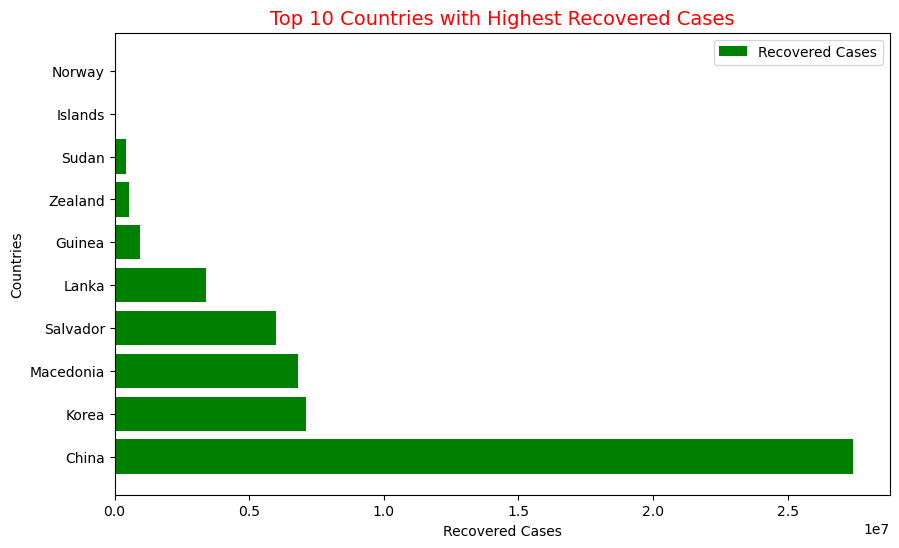

In [30]:
# Task 2: Explore top 10 countries with most recovered cases

df2 = df.groupby('Country')['Recovered'].sum().sort_values(ascending=False).head(10)

x = df2.index          # country names
y = df2.values         # recovered numbers

plt.figure(figsize=(10,6))
plt.barh(x, y, color='green', label="Recovered Cases")

plt.xlabel("Recovered Cases")
plt.ylabel("Countries")
plt.title("Top 10 Countries with Highest Recovered Cases", fontsize=14, color='red')
plt.legend()
plt.show()

In [35]:
# Task 3: Summary of recovery rates for each country.
# Calculate the recovery rate for each country using the formula: Recovery Rate=(Recovered Cases/Confirmed Cases)×100

df["Recovery Rate"]=(df["Recovered"]/df["Confirmed"])*100
df

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovery Rate
0,1,2019-03-22,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000
1,2,2019-03-24,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,0.000000
2,3,2019-03-25,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,0.000000
3,4,2019-03-26,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000
4,5,2019-03-27,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
15034,221561,2021-08-02,NaN,El,Salvador,NaT,56653,1692,50999,90.019946
15035,221562,2021-08-02,NaN,Equatorial,Guinea,NaT,5614,87,5413,96.419665
15036,221615,2021-08-02,NaN,Marshall,Islands,NaT,4,0,4,100.000000
15037,221627,2021-08-02,NaN,New,Zealand,NaT,2322,25,2230,96.037898


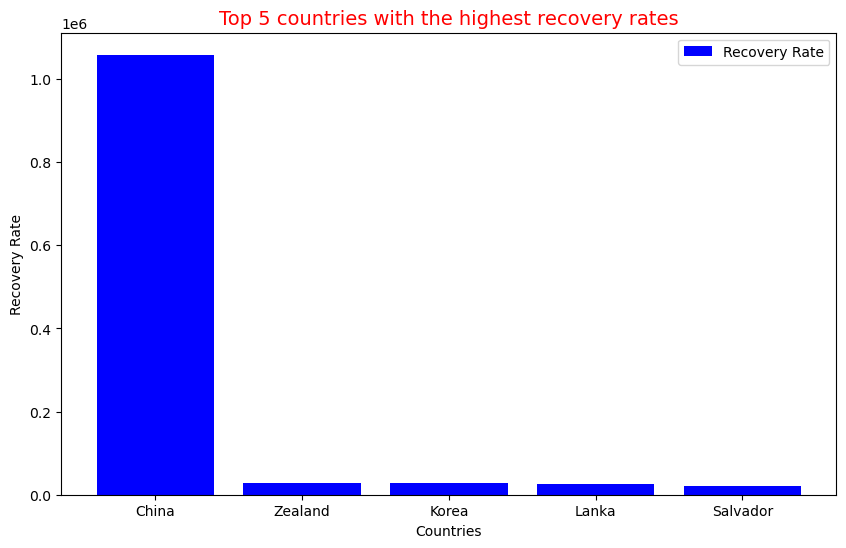

In [36]:
# Task 4: Visualize the top 5 countries with the highest recovery rates.

df3 = df.groupby('Country')['Recovery Rate'].sum().sort_values(ascending=False).head(5)

x = df3.index          # country names
y = df3.values         # recovered numbers

plt.figure(figsize=(10,6))
plt.bar(x, y, color='blue', label="Recovery Rate")

plt.xlabel("Countries")
plt.ylabel("Recovery Rate")
plt.title("Top 5 countries with the highest recovery rates", fontsize=14, color='red')
plt.legend()
plt.show()

In [37]:
df['Month'] = df['ObservationDate'].dt.to_period('M')
df

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovery Rate,Month
0,1,2019-03-22,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000,2019-03
1,2,2019-03-24,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,0.000000,2019-03
2,3,2019-03-25,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,0.000000,2019-03
3,4,2019-03-26,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000,2019-03
4,5,2019-03-27,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,NaN,2019-03
...,...,...,...,...,...,...,...,...,...,...,...
15034,221561,2021-08-02,NaN,El,Salvador,NaT,56653,1692,50999,90.019946,2021-08
15035,221562,2021-08-02,NaN,Equatorial,Guinea,NaT,5614,87,5413,96.419665,2021-08
15036,221615,2021-08-02,NaN,Marshall,Islands,NaT,4,0,4,100.000000,2021-08
15037,221627,2021-08-02,NaN,New,Zealand,NaT,2322,25,2230,96.037898,2021-08


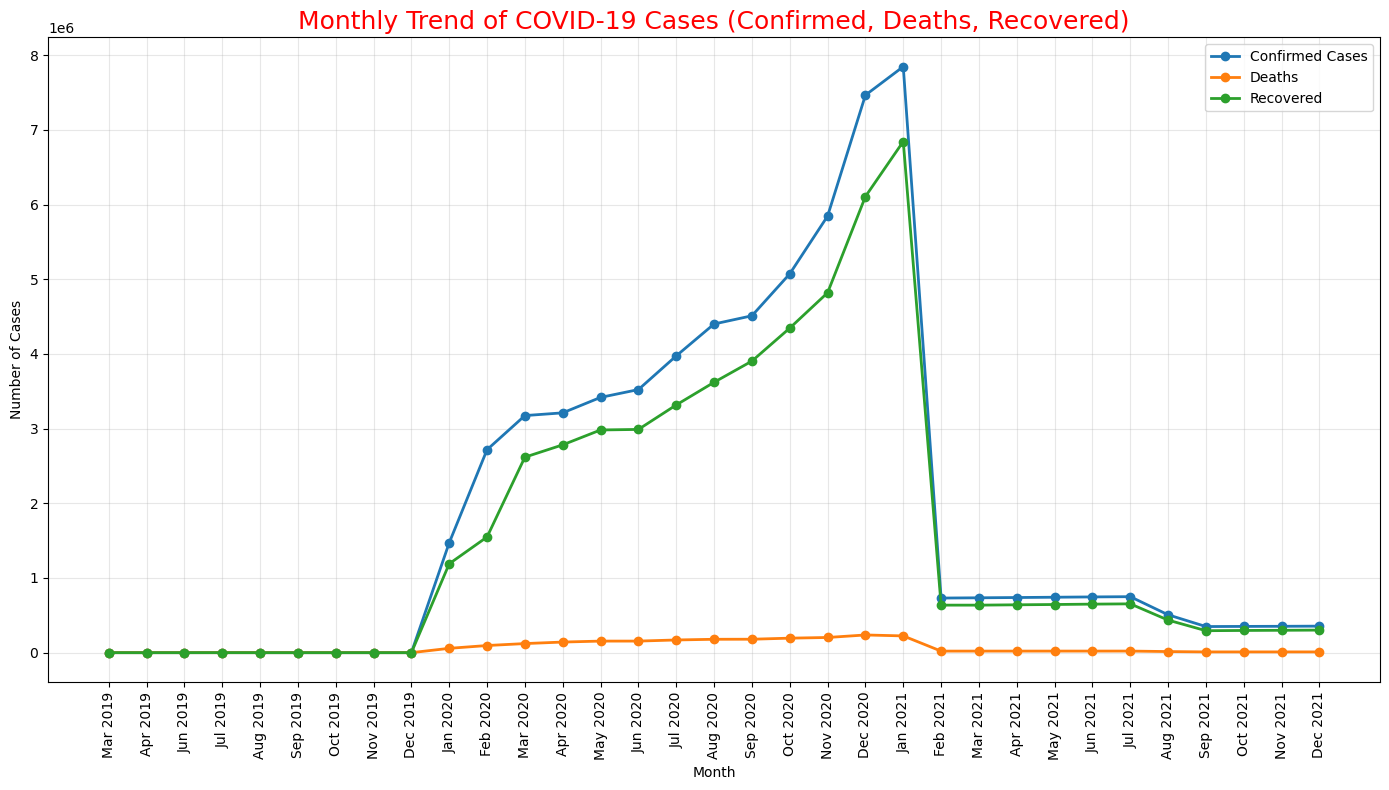

In [38]:
# Task 5: Monthly Trend of COVID-19 Cases

df_monthly = df.groupby("Month")[['Confirmed','Deaths','Recovered']].sum()

x = df_monthly.index.to_timestamp().strftime('%b %Y')   
y1 = df_monthly['Confirmed']
y2 = df_monthly['Deaths']
y3 = df_monthly['Recovered']

plt.figure(figsize=(14,8)) 

plt.plot(x, y1, marker='o', label='Confirmed Cases', linewidth=2)
plt.plot(x, y2, marker='o', label='Deaths', linewidth=2)
plt.plot(x, y3, marker='o', label='Recovered', linewidth=2)

plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.title("Monthly Trend of COVID-19 Cases (Confirmed, Deaths, Recovered)", fontsize=18, color='red')

plt.xticks(rotation=90)     
plt.grid(True, alpha=0.3)   
plt.legend()
plt.tight_layout()          
plt.show() 


In [39]:
df['Year'] = df['ObservationDate'].dt.year
df

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered,Recovery Rate,Month,Year
0,1,2019-03-22,Anhui,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000,2019-03,2019
1,2,2019-03-24,Beijing,Mainland,China,2020-01-22 17:00:00,14,0,0,0.000000,2019-03,2019
2,3,2019-03-25,Chongqing,Mainland,China,2020-01-22 17:00:00,6,0,0,0.000000,2019-03,2019
3,4,2019-03-26,Fujian,Mainland,China,2020-01-22 17:00:00,1,0,0,0.000000,2019-03,2019
4,5,2019-03-27,Gansu,Mainland,China,2020-01-22 17:00:00,0,0,0,NaN,2019-03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,221561,2021-08-02,NaN,El,Salvador,NaT,56653,1692,50999,90.019946,2021-08,2021
15035,221562,2021-08-02,NaN,Equatorial,Guinea,NaT,5614,87,5413,96.419665,2021-08,2021
15036,221615,2021-08-02,NaN,Marshall,Islands,NaT,4,0,4,100.000000,2021-08,2021
15037,221627,2021-08-02,NaN,New,Zealand,NaT,2322,25,2230,96.037898,2021-08,2021


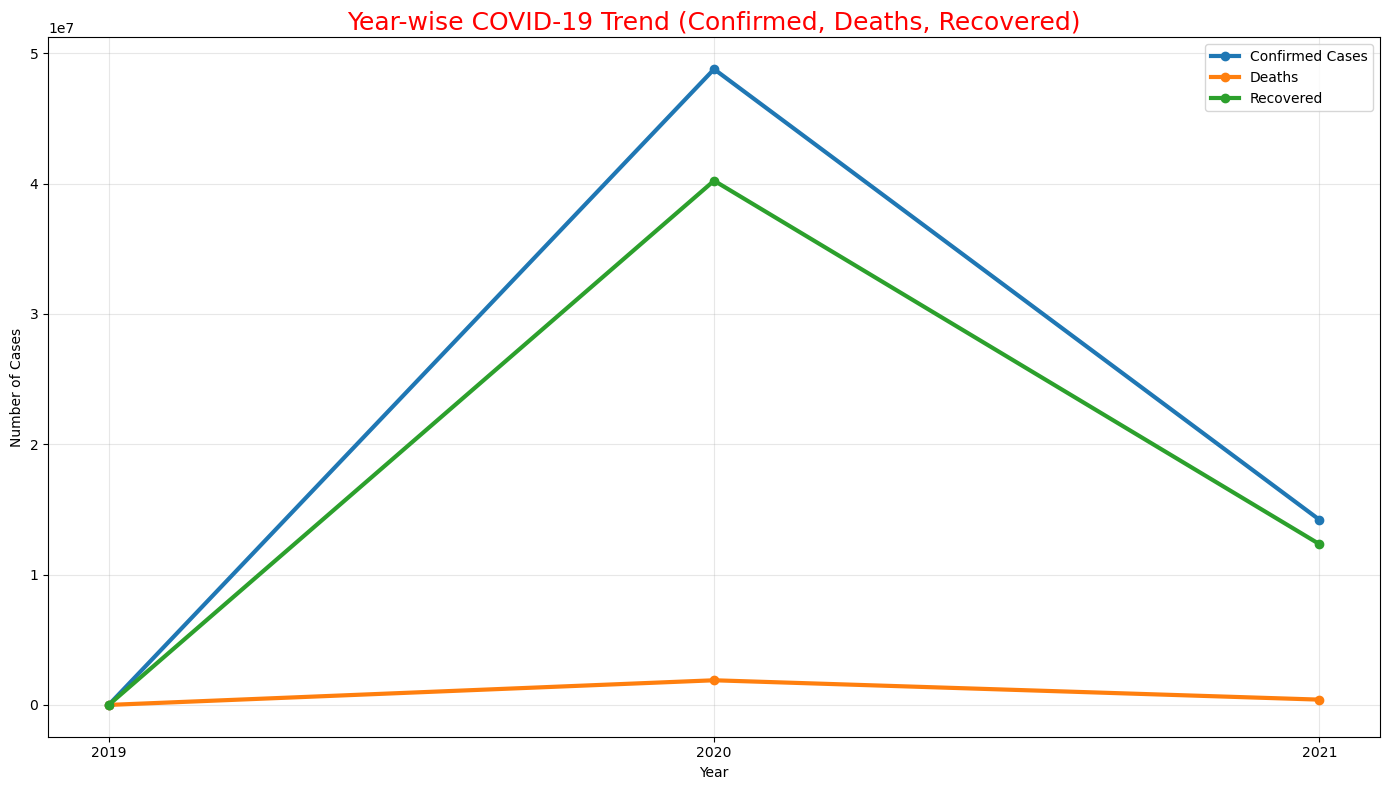

In [51]:
# Task 6: Make a chart to show overall (year-wise) COVID-19 data: death, confirmed, and recovery.

df_yearly = df.groupby("Year")[['Confirmed','Deaths','Recovered']].sum()

x = df_yearly.index   
y1 = df_yearly ['Confirmed']
y2 = df_yearly ['Deaths']
y3 = df_yearly ['Recovered']

plt.figure(figsize=(14,8)) 

plt.plot(x, y1, marker='o', label='Confirmed Cases', linewidth=3)
plt.plot(x, y2, marker='o', label='Deaths', linewidth=3)
plt.plot(x, y3, marker='o', label='Recovered', linewidth=3)

plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Year-wise COVID-19 Trend (Confirmed, Deaths, Recovered)", fontsize=18, color='red')

plt.grid(True, alpha=0.3)   
plt.legend()
plt.xticks(x, x.astype(str))
plt.tight_layout()          
plt.show()

In [52]:
#CFR=(Deaths/Confirmed Cases)*100
df['CFR']=df['Deaths']/df['Confirmed']*100

In [54]:
# Task 7: Write a function to display COVID-19 summary statistics for any given country.

def country_summary(country):
    # Filter rows for the selected country
    df_country = df[df['Country'] == country]
    
    if df_country.empty:
        print(f"No data found for '{country}'")
        return
    
    # Aggregate totals
    confirmed = df_country['Confirmed'].sum()
    deaths = df_country['Deaths'].sum()
    recovered = df_country['Recovered'].sum()
    
    # Calculate recovery rate
    recovery_rate = (recovered / confirmed) * 100 if confirmed > 0 else 0
    
    # Calculate CFR (Case Fatality Rate)
    cfr = (deaths / confirmed) * 100 if confirmed > 0 else 0
    
    # Print results
    print(f"\nCOVID-19 Summary for: {country}")
    print("-------------------------------------")
    print(f"Total Confirmed Cases : {confirmed}")
    print(f"Total Deaths          : {deaths}")
    print(f"Total Recovered       : {recovered}")
    print(f"Recovery Rate (%)     : {recovery_rate:.2f}%")
    print(f"Case Fatality Rate (%) : {cfr:.2f}%")

In [63]:
country=input("please enter country name")
country_summary(country)

please enter country name Zealand



COVID-19 Summary for: Zealand
-------------------------------------
Total Confirmed Cases : 559530
Total Deaths          : 6956
Total Recovered       : 515615
Recovery Rate (%)     : 92.15%
Case Fatality Rate (%) : 1.24%


In [62]:
# 8- Write a function to display COVID-19 summary statistics for any given month.

def month_summary(month):
    # Filter the dataframe for the selected month
    df_month = df[df['Month'] == month]
    
    if df_month.empty:
        print(f"No data found for month '{month}'")
        return
    
    # Aggregate totals
    confirmed = df_month['Confirmed'].sum()
    deaths = df_month['Deaths'].sum()
    recovered = df_month['Recovered'].sum()
    
    # Calculate recovery rate
    recovery_rate = (recovered / confirmed) * 100 if confirmed > 0 else 0
    
    # Calculate Case Fatality Rate (CFR)
    cfr = (deaths / confirmed) * 100 if confirmed > 0 else 0

    # Print results
    print(f"\nCOVID-19 Summary for Month: {month}")
    print("-------------------------------------")
    print(f"Total Confirmed Cases : {confirmed}")
    print(f"Total Deaths          : {deaths}")
    print(f"Total Recovered       : {recovered}")
    print(f"Recovery Rate (%)     : {recovery_rate:.2f}%")
    print(f"Case Fatality Rate (%) : {cfr:.2f}%")

In [61]:
month_summary("2021-03")


COVID-19 Summary for Month: 2021-03
-------------------------------------
Total Confirmed Cases : 734802
Total Deaths          : 21018
Total Recovered       : 636397
Recovery Rate (%)     : 86.61%
Case Fatality Rate (%) : 2.86%
